### Unsupervised Learning in Artificial is a type of machine learning that learns from data without human supervision. 

Unlike supervised learning, unsupervised machine learning models are given unlabeled data and allowed to discover patterns and insight without any explicit guidance or instruction 

Unsupervised learning is a technique of learning the patterns without any label or assistance

We can use our Business sense to judge whether the prediction are good or not

## Clustering Analysis

Clustering Analysis is a branch of unsupervised ML 

Clustering is a technique that involves grouping of similar data point

Classify each data point into a specific group

Data points that are in the same group should exhibit similar features, while data points in different groups exhibit dissimilar properties and features

## Types of Clustering Analysis

#### Hard Clustering
Each data point either belongs to a Cluster completely or not
This means that every data point will belong to one and only one cluster at a time


#### Soft Clustering
Each data point can belong to Multiple cluster ata the same time
This means data points can be associated to multiple Clusters at the same time 


In most cases we prefer hard Cluster, as we want data points to be in one cluster only

Apart from hard and soft clustering we also have some other clustering

#### Connectivity Based Clustering Models
This model work on the basis of distance and assume thet if the two data point are closer to each other they are similar to each Other.
The Data point lying closer to each other will  be grouped together in one cluster, and the data points lying far from each other will be separated in different clusters. 


#### Centriods Based Clustering Models 
These Models work on the notion that similarity is derived by the closeness of a data point to the centriod of the clusters.
The points will be divide into different clusters based on the closeness to a centriod.
One of the most famous algorithms that fall under this category os Kmeans Algorithm


#### Density Based Clustering Models
These Models cluster the data points by finding areas of varied density, and assigning data points to these different density regions

One of the most famous Algorithm that falls under this category is DBSCAN

### K Means Clustering

K means algorithm is a Centriod Based Algorithm

K-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observertions into k cluster in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster


It tries to make the intra-cluster data points as similar as possible while also keeping the clusters as different as possible

it also assign data points to a cluster such that the sum of the squared distance between the data points and the clusters centriod minimum

Using the elbow method to choose the best value for k 

'K' in K means algorithm simple means the number of clusters we want from our data

so we need to find the optimal of k

The elbow method is heuristic used in determining the number of optimum clusters in a dataset

The method helps us to find out the optimum number of clusters in a dataset

we plot the explained variation against the number of clusters and finally pick the elbow of the curves as the number of cluster to use

if we have multiple elbow in the curve we will have to pick the last elbow


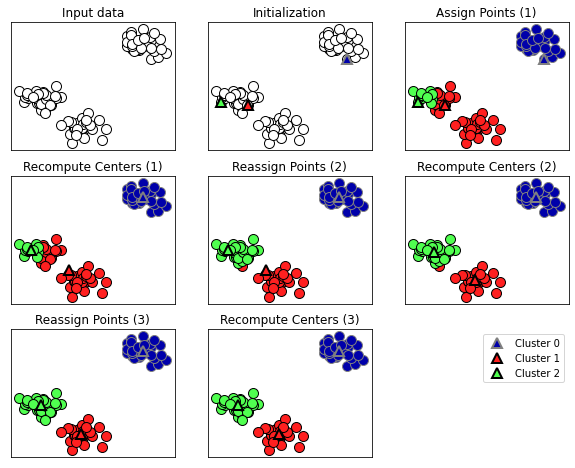

In [1]:
# A code sample to visualize how k-means work is mglearn library

import warnings
import mglearn

warnings.filterwarnings('ignore')

mglearn.plots.plot_kmeans_algorithm()

### Using K-means to solve a problem (Customer Classification)

In [2]:
# importing all required library

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
# Reading the dataset 
data = pd.read_csv('Mall_Customers.csv')

# Lets check the shape of the data
data.shape

(200, 5)

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

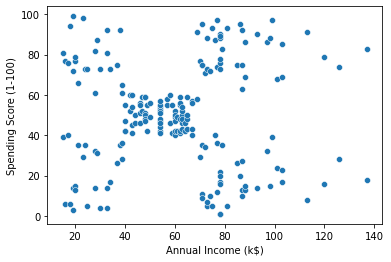

In [5]:
# find the distinct groups of customer present in the mall data 

# let us take a look at the relationship of annual income and spending score

sns.scatterplot(data['Annual Income (k$)'], data['Spending Score (1-100)'])

In [6]:
# We are making an array of two columns, which consist of annual income and spending score

x = data.loc[:, ['Annual Income (k$)' , 
                 'Spending Score (1-100)']].values

# let check the shape of X

print(x.shape)

(200, 2)


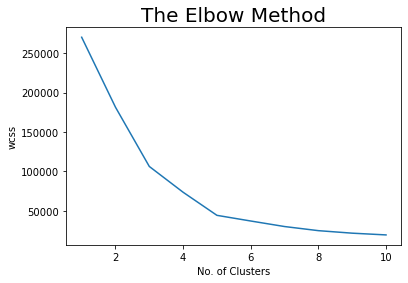

In [7]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
                init= 'k-means++',
                max_iter= 300,
                n_init=10, 
                random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
    
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

## Silhoutte Values

The silhoutte values help us evaluate our clusters

Silhoutte values lie in the range of -1 and 1.The value of +1 is ideal and -1 is least preferred.

Value of +1 indicates that the sample is far away from its neighbouring cluster and very close to the cluster it is assigned

Value of -1 indicates that the point is close to its neighbouring cluster than to the cluster its assigned

Value of 0 means it is at the boundary of the distance between the two clusters.

### Working of silhoutte Analysis

It measures the quality of a clustering. That is, it determines how well each object lies within its cluster

The optimal number of clusters of k is the one that maximizes the average silhouette over a range of possible values for k



In [8]:
from sklearn.metrics import silhouette_score

# Calculate the score
score = silhouette_score(x, km.labels_, metric='euclidean')

# Print the score
print('Silhouetter score : %.3f' % score)

Silhouetter score : 0.448


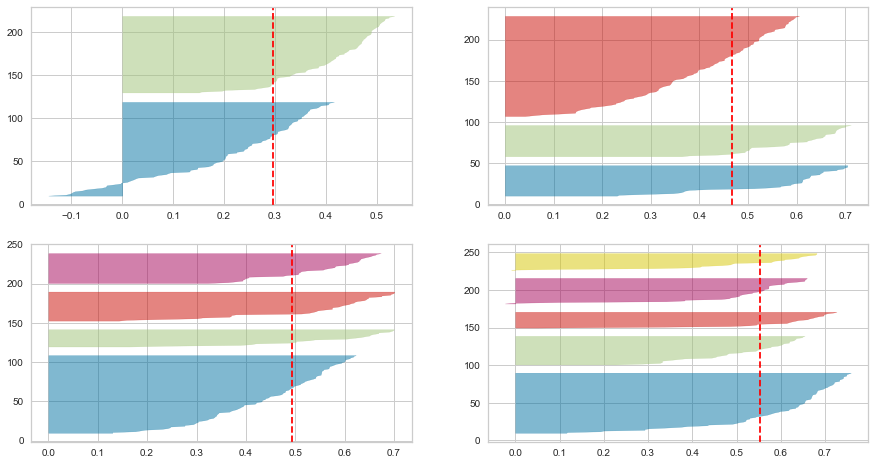

In [9]:
from yellowbrick.cluster import SilhouetteVisualizer


fig, ax = plt.subplots(2 ,2 ,figsize=(15, 8))
for i in [2,3,4,5]:
    # create Kmeans instance for different number of clusters
    km= KMeans(n_clusters = i, init='k-means++', 
               n_init= 10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    
    #create silhouette visualizer with kmeans instance
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', 
                                       ax=ax[q-1][mod])
    visualizer.fit(x)

### Clustering Multiple Dimensions

In [10]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
a = data.loc[:, ['Age', 'Annual Income (k$)',
            'Spending Score (1-100)']].values


# lets check the shape of x
print(a.shape)

(200, 3)


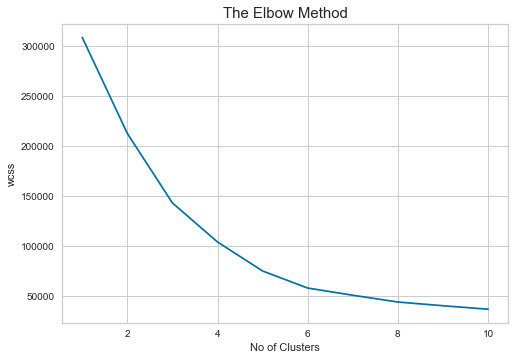

In [12]:
from sklearn.cluster import KMeans
    
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i, init='k-means++', 
                max_iter=300, n_init= 10, random_state=0)
    km.fit(a)
    wcss.append(km.inertia_)
    
    
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method', fontsize=15)
plt.xlabel('No of Clusters')
plt.ylabel('wcss')
plt.show()

In [13]:
# Performing Kmeans Clustering Analysis

km = KMeans(n_clusters=6, init='k-means++', 
            max_iter=300, n_init=100, random_state=0)
y_means = km.fit_predict(a)

In [14]:
y_means = pd.DataFrame(y_means)

df = pd.concat([data, y_means], axis=1)

df = df.rename(columns = {0:'Clusters'})

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,5
2,3,Female,20,16,6,4
3,4,Female,23,16,77,5
4,5,Female,31,17,40,4


In [15]:
print('Customer IDs for Cluster1: ', df[df['Clusters'] == 1]['CustomerID'].values)
print('Customer IDs for Cluster2: ', df[df['Clusters'] == 2]['CustomerID'].values)
print('Customer IDs for Cluster3: ', df[df['Clusters'] == 3]['CustomerID'].values)
print('Customer IDs for Cluster4: ', df[df['Clusters'] == 4]['CustomerID'].values)
print('Customer IDs for Cluster5: ', df[df['Clusters'] == 5]['CustomerID'].values)


Customer IDs for Cluster1:  [127 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]
Customer IDs for Cluster2:  [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]
Customer IDs for Cluster3:  [ 41  43  47  51  54  55  56  57  58  60  61  63  64  65  67  68  71  72
  73  74  75  77  80  81  83  84  86  87  90  91  93  97  99 102 103 105
 107 108 109 110 111 117 118 119 120]
Customer IDs for Cluster4:  [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 45]
Customer IDs for Cluster5:  [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]


## Hierarchical Clustering

It is an algorithm that groups similar objects into groups clusters

The endpoint is a set of clusters, where each cluster is distinct from each other cluster


### Types of Hierachical Clustering

Divisive

Agglomerative



#### Divisive Method

Top-down clustering Method

Assign all of the observations to a single cluster and then partition the cluster to two least similar clusters

Proceed recursively on each cluster until there is one cluster for each observation

Produce more accurate heirachies than agglomerative algorithms in some circumstances but are conceptually more complex


#### Agglomerative Method

Buttom-up clustering method

Assign each observation to its own cluster

Compute the similarity (e.g distance) between each of the cluster and join the two most similar clusters


### Methods for Computing Distance

There are three different methods which differ in how the distance between each cluster is measured

Single Linkage

Complete Linkage

Average Linkage

##### Single Linkage

Distance between two cluster is defined as the shortest distance between two points in each cluster.

For instance: the distance between clusters 'r' and 's' to the left is equal to the length of the arrow between their two closest points


##### Single Linkage

Distance between two cluster is defined as the longest distance between two points in each cluster.

For instance: the distance between clusters 'r' and 's' to the left is equal to the length of the arrow between their two furthest points


##### Single Linkage

Distance between two cluster is defined as the average distance between each  points in one cluster to every point in the other cluster

For instance: the distance between clusters 'r' and 's' to the left is equal to the average length of each arrow connecting the points of one cluster to the other.


### Note: We cannot use the elbow method for deciding the optimal number of cluster, we have to use dendograms

### Dendograms

A Dendogram is a diagram that show the hierachical relationship between objects

it is most commonly created as an output from hierachical clustering

The main use of the dendogram is to work out the best way to allocate objects of clusters

In [16]:
x = data.loc[:, ['Annual Income (k$)',
            'Spending Score (1-100)']].values

# lets us check the shape of x
print(x.shape)

(200, 2)


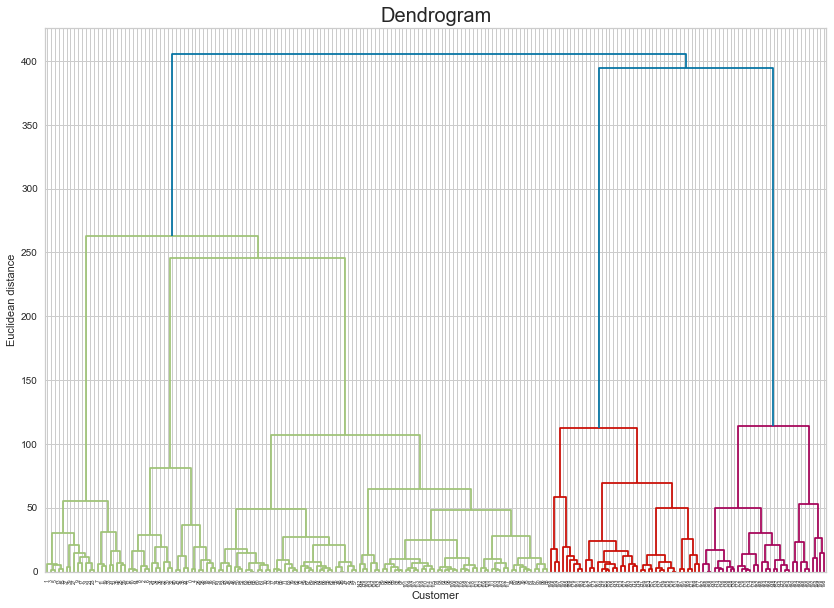

In [17]:
# plottind a dendogram 

import scipy.cluster.hierarchy as sch

plt.rcParams['figure.figsize'] = (14, 10)

dendogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram', fontsize = 20)
plt.xlabel('Customer')
plt.ylabel('Euclidean distance')
plt.show()

In [18]:
# Implementing the Hierachical Clustering 

from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters= 5, affinity='euclidean', linkage='ward')

y_hc = hc.fit_predict(x)

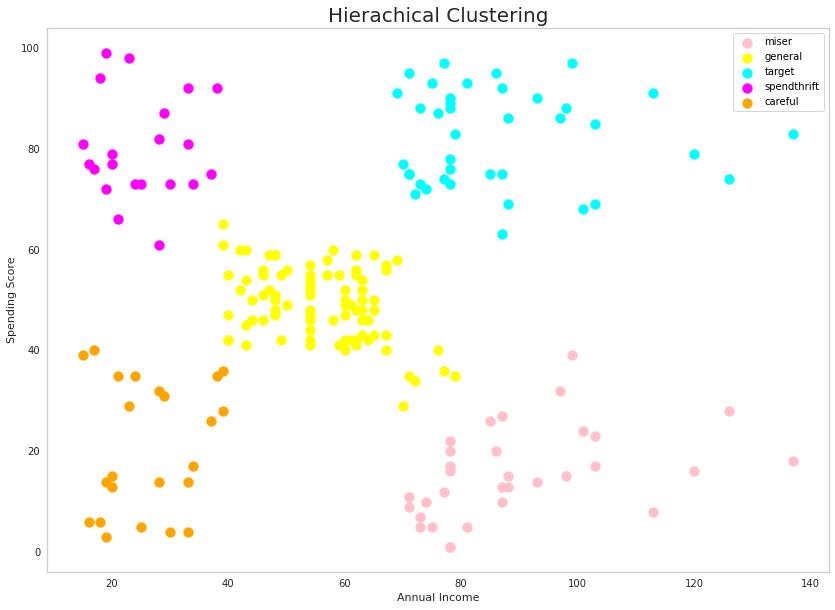

In [19]:
# Visualizing the cluster

plt.scatter(x[y_hc == 0,0], x[y_hc == 0,1], s=100, c='pink', label = 'miser')
plt.scatter(x[y_hc == 1,0], x[y_hc == 1,1], s=100, c='yellow', label = 'general')
plt.scatter(x[y_hc == 2,0], x[y_hc == 2,1], s=100, c='cyan', label = 'target')
plt.scatter(x[y_hc == 3,0], x[y_hc == 3,1], s=100, c='magenta', label = 'spendthrift')
plt.scatter(x[y_hc == 4,0], x[y_hc == 4,1], s=100, c='orange', label = 'careful')


plt.style.use('default')
plt.rcParams['figure.figsize']= (15,5)
plt.title('Hierachical Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

### Introductioninto DBSCAN clustering

DBSCAN stands Density-Based spatial clustering of applications with noise

DBSCAN groups together points that are close to each other based on adistance measurement and a minimum of points

It basically require two parameters which are Eps and Minpoints

EPS: specifies how close points should be to each other to be considered a part of a cluster

This Value will be considered as a threshold for considering two points as a neighbour.


MINPOINTS: is the minimum number of points to form a dense region.


Generally the number of minpoints is equal to twice the number of columns in the dataset



